In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/Colab\ Notebooks/

/content/drive/My Drive/Colab Notebooks


# Import Packages

In [0]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [0]:
#load in Data
df = pd.read_csv('Data/Bangkit/bank_customer_survey.csv')

# Predefined Function

In [0]:
#ordinal plot with line

import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.pyplot as plt


def ploting_cat_fet(train, cols, vis_row=5, vis_col=2):
    
    grid = gridspec.GridSpec(vis_row,vis_col) # The grid of chart
    plt.figure(figsize=(17, 35)) # size of figure

    # loop to get column and the count of plots
    for n, col in enumerate(train[cols]): 
        tmp = pd.crosstab(train[col], train['y'], normalize='index') * 100
        tmp = tmp.reset_index()
        tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

        ax = plt.subplot(grid[n]) # feeding the figure of grid
        sns.countplot(x=col, data=train, order=list(tmp[col].values) , palette='Set1') 
        ax.set_ylabel('Count', fontsize=15) # y axis label
        ax.set_title(f'{col} Distribution by Target', fontsize=18) # title label
        ax.set_xlabel(f'{col} values', fontsize=15) # x axis label
        plt.xticks(rotation = 45)

        # twinX - to build a second yaxis
        gt = ax.twinx()
        gt = sns.pointplot(x=col, y='Yes', data=tmp,
                           order=list(tmp[col].values),
                           color='black', legend=False)
        gt.set_ylim(tmp['Yes'].min()-5,tmp['Yes'].max()*1.1)
        gt.set_ylabel("Target %(1)", fontsize=16)
        sizes=[] # Get highest values in y
        total = 0
        for p in ax.patches:
            total +=  p.get_height()
        for p in ax.patches: # loop to all objects
            height = p.get_height()
            sizes.append(height)
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(height/total*100),
                    ha="center", fontsize=14) 
        ax.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights


    plt.subplots_adjust(hspace = 0.5, wspace=.3)
    plt.show()

# nom_cols = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
# ploting_cat_fet(train, nom_cols, vis_row=5, vis_col=2)

# Preprocessing

In [18]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [7]:
#Missing value checking
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
#Check Duplicated
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# EDA

In [19]:
#Check imbalancy
df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [20]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


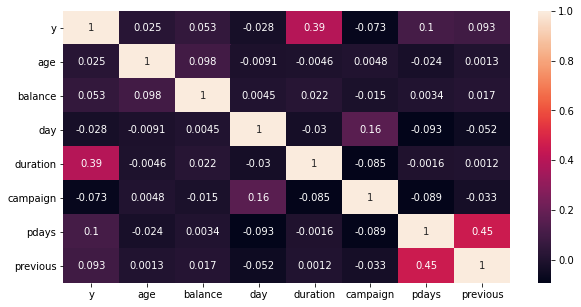

In [30]:
#Check Correlation
plt.figure(figsize = (10,5))
sns.heatmap(df[['y','age','balance','day','duration','campaign', 'pdays','previous']].corr(), annot = True)

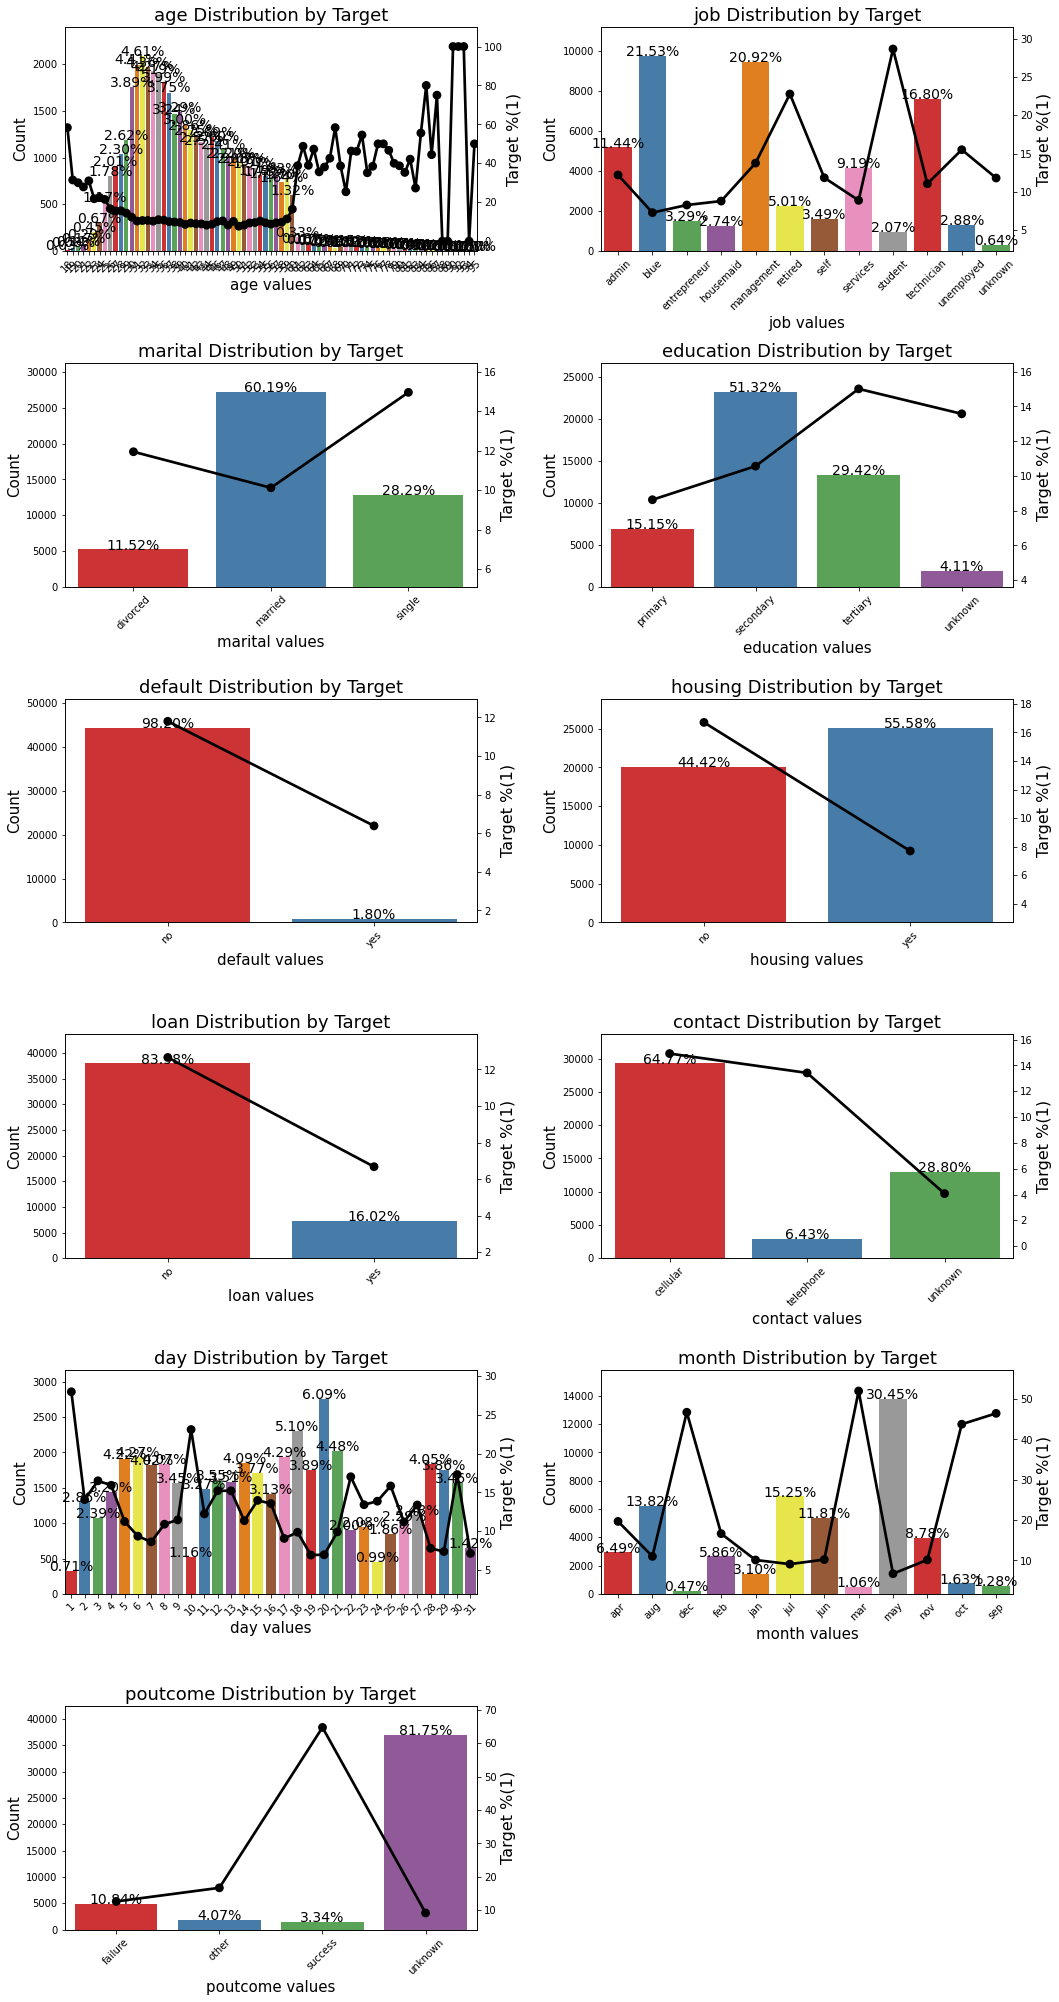

In [87]:
#Check categorical feature by percentage of y
nom_cols = ['age','job', 'marital', 'education', 'default','housing','loan','contact','day','month','poutcome']
ploting_cat_fet(df, nom_cols, vis_row=6, vis_col=2)

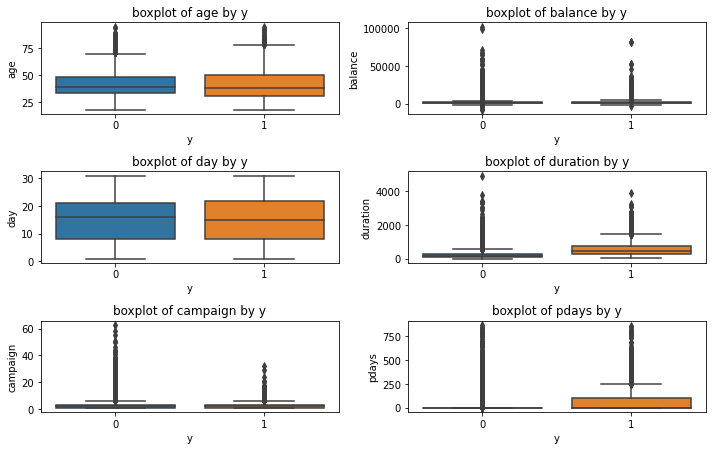

In [58]:
fig = plt.figure(figsize = (10,8))
num_col = ['age','balance','day','duration','campaign','pdays','previous']

for i in range(6):
    ax = fig.add_subplot(4,2,i+1)
    plt.title('boxplot of {} by y'.format(num_col[i]))
    sns.boxplot(y = num_col[i], x = 'y', data = df)
fig.tight_layout()

# Feature engineering

In [0]:
#one hot encoding
col = ['job','marital','education','contact','poutcome']
for i in range(5):
    df = pd.concat([df.drop(col[i], axis = 1),pd.get_dummies(df[col[i]])], axis = 1)

In [92]:
#label binary
binary_col = ['default','housing','loan']
for i in range(3):
    df[binary_col[i]] = df[binary_col[i]].map({'no':0,'yes':1})

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [0]:
df['month'] = df['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,
                               'may':5,'jun':6,'jul':7,'aug':8,
                               'sep':9,'oct':10,'nov':11,'des':12})

# modelling

In [100]:
df.shape

(45211, 38)

In [102]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
x = tf.placeholder(tf.float32, [None, 38])

#layer1
W1 = tf.Variable(tf.truncated_normal([38, 50], stddev = 0.15))
b1 = tf.Variable(tf.zeros([50]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

#layer2
W2 = tf.Variable(tf.truncated_normal([50, 75], stddev = 0.15))
b2 = tf.Variable(tf.zeros([75]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

#layer3
W3 = tf.Variable(tf.truncated_normal([75, 100], stddev = 0.15))
b3 = tf.Variable(tf.zeros([100]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)

#layer4
W4 = tf.Variable(tf.truncated_normal([100, 1], stddev = 0.15))
b4 = tf.Variable(tf.zeros([1]))
y4 = tf.nn.sigmoid(tf.matmul(y3, W4) + b4)

# output
y = y4
y_ = tf.placeholder(tf.float32, [None, 1])